In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [2]:
raw_df=pd.read_csv('weatherAUS.csv')

In [3]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [6]:
raw_df.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

<Axes: xlabel='Date', ylabel='count'>

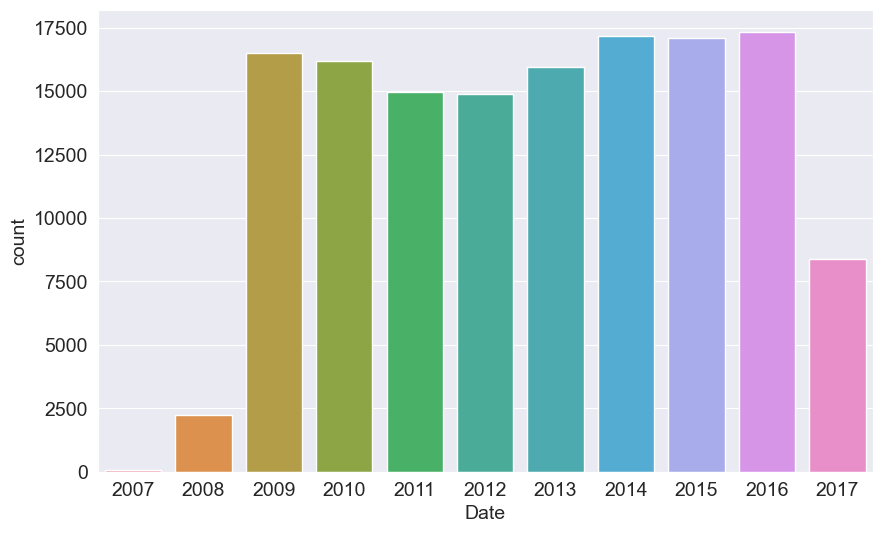

In [7]:
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [8]:
year=pd.to_datetime(raw_df.Date).dt.year
train_df=raw_df[year<2015]
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]

In [9]:
x_train=train_df.iloc[:,1:-1]
y_train=train_df.iloc[:,-1]
x_val=val_df.iloc[:,1:-1]
y_val=val_df.iloc[:,-1]
x_test=test_df.iloc[:,1:-1]
y_test=test_df.iloc[:,-1]

In [10]:
import numpy as np
numeric_cols=x_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols=x_train.select_dtypes('object').columns.tolist()

In [11]:
x_train[categorical_cols].nunique()


Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [13]:
x_train[numeric_cols]=imputer.transform(x_train[numeric_cols])
x_val[numeric_cols]=imputer.transform(x_val[numeric_cols])
x_test[numeric_cols]=imputer.transform(x_test[numeric_cols])

In [14]:
x_test[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [15]:
x_test[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000,25710.000000
mean,12.848233,23.867157,2.405053,5.752690,7.642804,39.351835,13.720029,18.249796,70.033652,52.035884,1017.282868,1014.872588,4.725408,4.711538,17.488111,22.142963
std,6.461933,7.298568,8.381634,3.216536,2.105056,13.124704,8.621791,8.345923,18.569773,20.054961,6.723174,6.644399,2.188492,1.947223,6.583160,6.878611
min,-7.800000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000,3.000000,982.000000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.100000,18.300000,0.000000,5.472516,7.630540,31.000000,7.000000,13.000000,58.000000,38.000000,1013.200000,1010.600000,4.431161,4.499250,12.700000,17.200000
50%,12.700000,23.400000,0.000000,5.472516,7.630540,39.000000,13.000000,18.631141,71.000000,51.449288,1017.654577,1015.257963,4.431161,4.499250,17.200000,21.693183
75%,17.500000,29.000000,0.800000,5.472516,7.630540,46.000000,19.000000,22.000000,84.000000,65.000000,1021.300000,1018.900000,7.000000,6.000000,22.100000,26.700000
max,31.400000,47.300000,225.000000,145.000000,14.100000,120.000000,130.000000,65.000000,100.000000,100.000000,1040.300000,1036.500000,8.000000,8.000000,37.600000,46.700000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(raw_df[numeric_cols])
scaler.data_min_

array([ -8.5,  -4.8,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 977.1,   0. ,   0. ,  -7.2,  -5.4])

In [17]:
x_train[numeric_cols]=scaler.transform(x_train[numeric_cols])
x_val[numeric_cols]=scaler.transform(x_val[numeric_cols])
x_test[numeric_cols]=scaler.transform(x_test[numeric_cols])

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit(raw_df[categorical_cols])

OneHotEncoder()

In [19]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [20]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [21]:
x_train[encoded_cols]=encoder.transform(x_train[categorical_cols]).toarray()
x_val[encoded_cols]=encoder.transform(x_val[categorical_cols]).toarray()
x_test[encoded_cols]=encoder.transform(x_test[categorical_cols]).toarray()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25528\1716004835.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_train[encoded_cols]=encoder.transform(x_train[categorical_cols]).toarray()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25528\1716004835.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_train[encoded_cols]=encoder.transform(x_train[categorical_cols]).toarray()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25528\1716004835.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25528\1716004835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[encoded_cols]=encoder.transform(x_test[categorical_cols]).toarray()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25528\1716004835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_test[encoded_cols]=encoder.transform(x_test[categorical_cols]).toarray()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25528\1716004835.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

In [22]:
x_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284,No,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [23]:
x_train=x_train[numeric_cols+encoded_cols]
x_val=x_val[numeric_cols+encoded_cols]
x_test=x_test[numeric_cols+encoded_cols]

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model=DecisionTreeClassifier(random_state=42)

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
pred=model.predict(x_train)

In [28]:
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [29]:
pd.value_counts(pred)

No     76192
Yes    21796
Name: count, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_train,pred)

0.9999795893374699

In [31]:
model.predict_proba(x_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [32]:
model.score(x_val,y_val)

0.7936684416876353

In [33]:
model.score(x_test,y_test)

0.7756126021003501

In [34]:
from sklearn.tree import plot_tree,export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, 

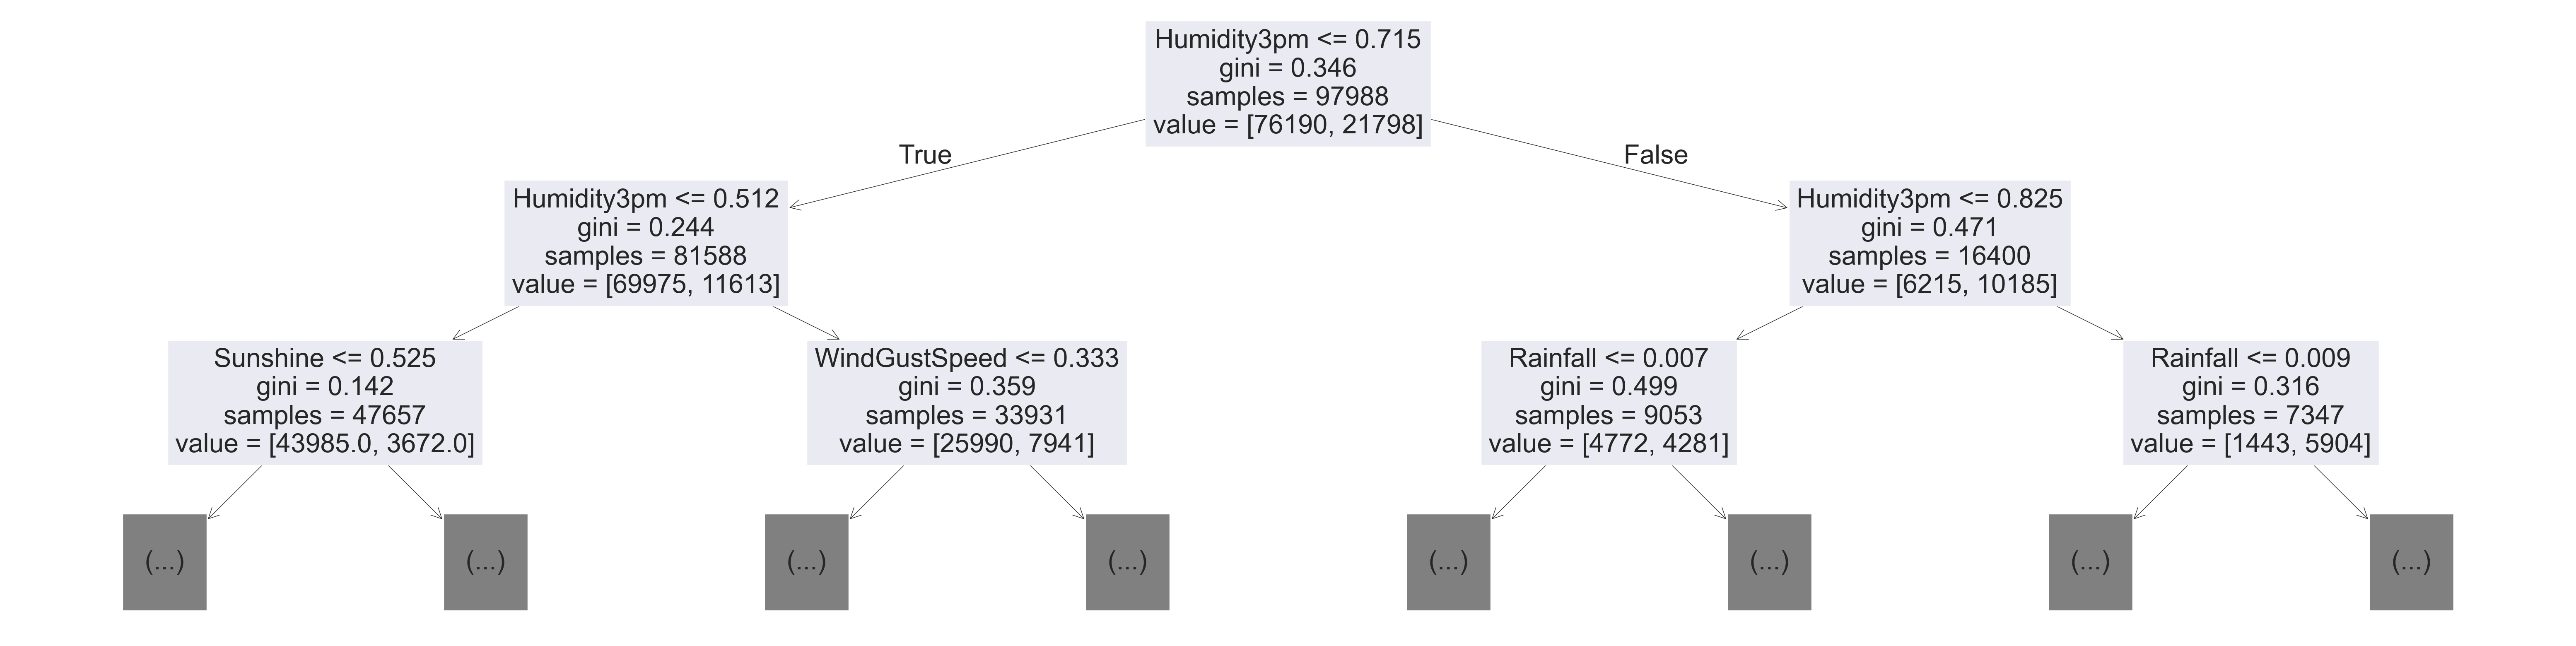

In [35]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=x_train.columns,max_depth=2)

In [36]:
model.tree_.max_depth

49

In [37]:
tree_text=export_text(model,max_depth=3,feature_names=list(x_train.columns))

In [38]:
print(tree_text)

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- truncated branch of depth 24
|   |   |   |--- Pressure3pm >  0.58
|   |   |   |   |--- truncated branch of depth 26
|   |   |--- Sunshine >  0.53
|   |   |   |--- WindGustSpeed <= 0.39
|   |   |   |   |--- truncated branch of depth 36
|   |   |   |--- WindGustSpeed >  0.39
|   |   |   |   |--- truncated branch of depth 32
|   |--- Humidity3pm >  0.51
|   |   |--- WindGustSpeed <= 0.33
|   |   |   |--- Rainfall <= 0.01
|   |   |   |   |--- truncated branch of depth 46
|   |   |   |--- Rainfall >  0.01
|   |   |   |   |--- truncated branch of depth 32
|   |   |--- WindGustSpeed >  0.33
|   |   |   |--- Pressure3pm <= 0.55
|   |   |   |   |--- truncated branch of depth 30
|   |   |   |--- Pressure3pm >  0.55
|   |   |   |   |--- truncated branch of depth 25
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- Rainfall <= 0.01
|   |   |

In [39]:
x_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',
       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan',
       'RainToday_No', 'RainToday_Yes'],
      dtype='object', length=118)

In [40]:
model.feature_importances_

array([3.72348864e-02, 3.02750170e-02, 4.46807871e-02, 2.31016443e-02,
       4.74029876e-02, 6.02158346e-02, 2.59596261e-02, 2.87123098e-02,
       3.72718924e-02, 2.78696714e-01, 3.74751640e-02, 6.22463592e-02,
       1.50293521e-02, 1.72695492e-02, 3.51997396e-02, 3.28171151e-02,
       2.07437921e-03, 1.64079963e-03, 1.01783054e-03, 6.88212657e-04,
       1.48034667e-03, 1.10335980e-03, 1.19280342e-03, 1.77001797e-03,
       8.18956871e-04, 1.30986391e-03, 8.00314193e-04, 2.03677225e-03,
       1.38645663e-03, 4.84888047e-04, 6.08349928e-04, 1.26483304e-03,
       1.45258514e-04, 1.50514431e-03, 1.07182434e-03, 1.44829853e-03,
       9.12938347e-04, 8.15936194e-04, 1.26468932e-03, 1.49092396e-03,
       6.60526489e-04, 7.09652768e-04, 1.02344514e-03, 1.54844869e-03,
       1.31824900e-03, 6.07286685e-04, 5.04774518e-04, 1.50976724e-03,
       1.36782184e-03, 2.12844007e-03, 1.24769141e-03, 1.92047622e-03,
       1.46145581e-03, 2.12670031e-03, 1.36401119e-03, 4.10431985e-04,
      

In [41]:
importance_df=pd.DataFrame({'feature':x_train.columns,
                           'importance':model.feature_importances_}).sort_values('importance',ascending=False)

In [42]:
importance_df.head()

,feature,importance
9,Humidity3pm,0.278697
11,Pressure3pm,0.062246
5,WindGustSpeed,0.060216
4,Sunshine,0.047403
2,Rainfall,0.044681


<Axes: xlabel='importance', ylabel='feature'>

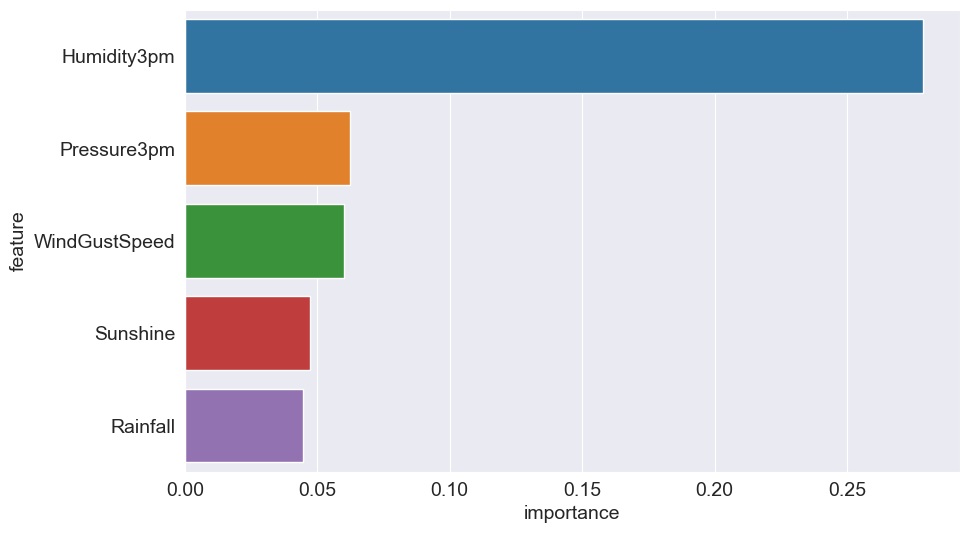

In [43]:
sns.barplot(data=importance_df.head(),x='importance',y='feature')

In [45]:
? DecisionTreeClassifier

In [109]:
model=DecisionTreeClassifier(max_depth=7,random_state=42)

In [110]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [111]:
model.score(x_train,y_train)

0.8509409315426378

In [112]:
model.score(x_val,y_val)

0.8453976242027035

In [113]:
model.score(x_test,y_test)

0.8334500194476857

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.7, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.58\ngini = 0.335\nsamples = 6010\nvalue = [4731, 1279]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'WindGustSpeed <= 0.391\ngini = 0.108\nsamples = 41647\nvalue = [39254, 2393]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.3, 'Rainfall <= 0.008\ngini = 0.304\nsamples = 27841\nvalue = [22637, 5204]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Pressure3pm <= 0.546\ngini = 0.495\nsamples

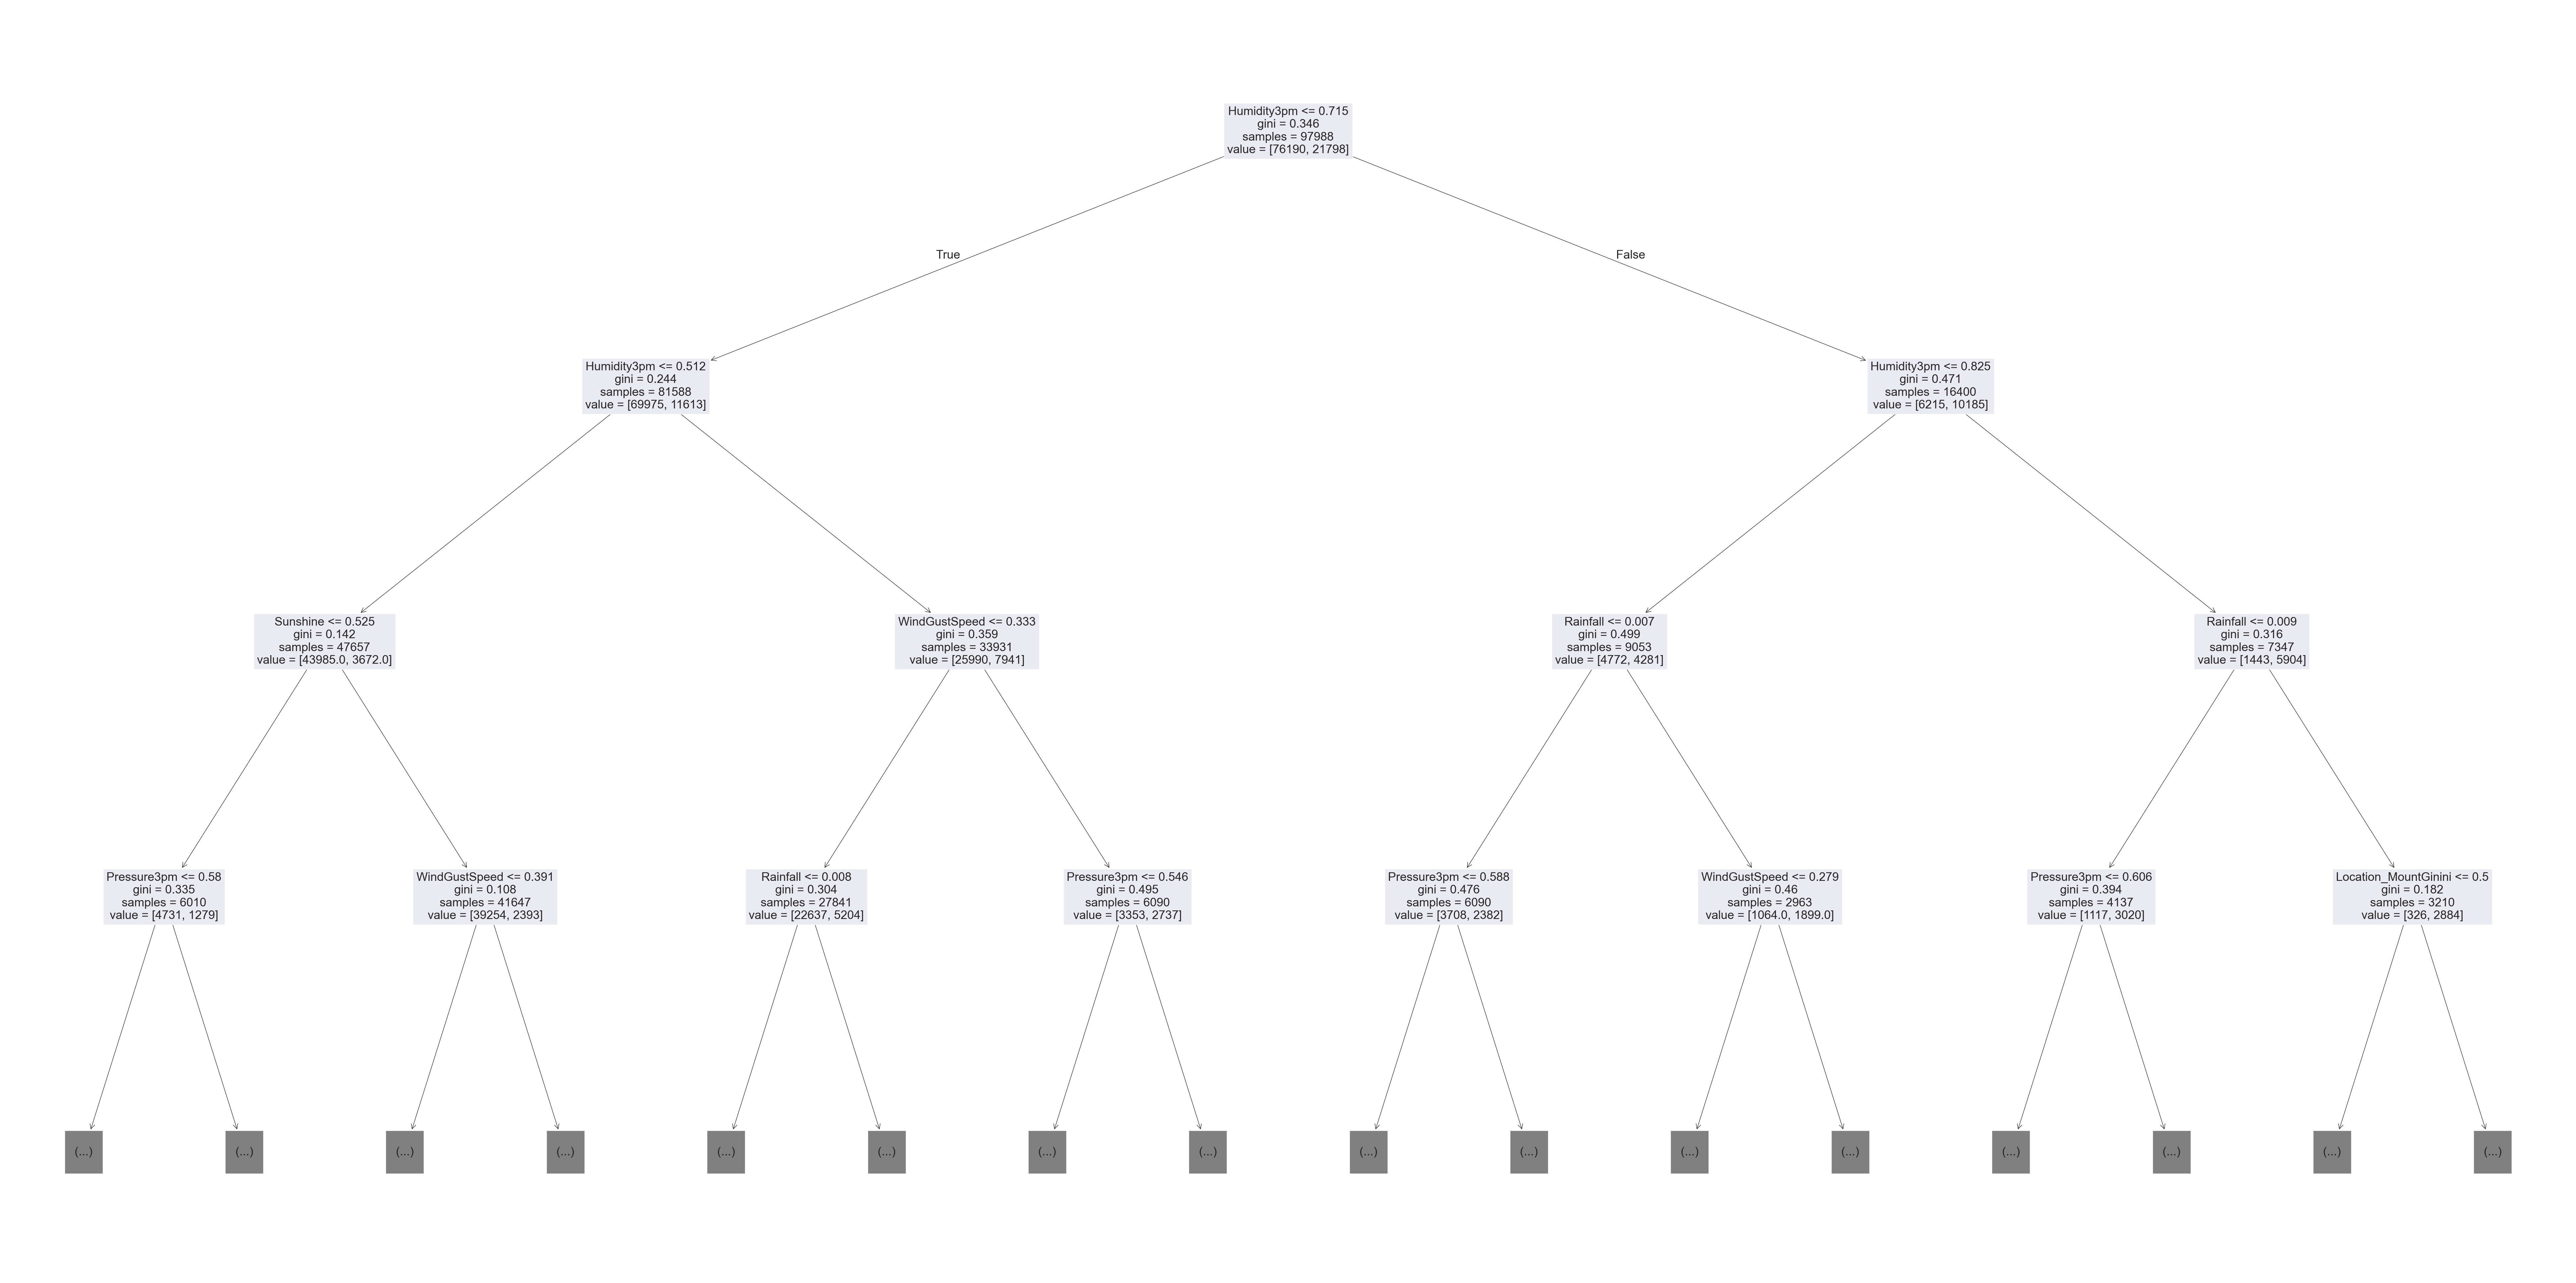

In [127]:
plt.figure(figsize=(100,50))
plot_tree(model,feature_names=x_train.columns,max_depth=3)

In [147]:
model=DecisionTreeClassifier(max_leaf_nodes=130,random_state=42)

In [148]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=130, random_state=42)

In [149]:
model.score(x_train,y_train)

0.8530534351145038

In [150]:
model.score(x_val,y_val)

0.8473286909707999

In [151]:
model.score(x_test,y_test)

0.8338778685336445

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985.0, 3672.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, 

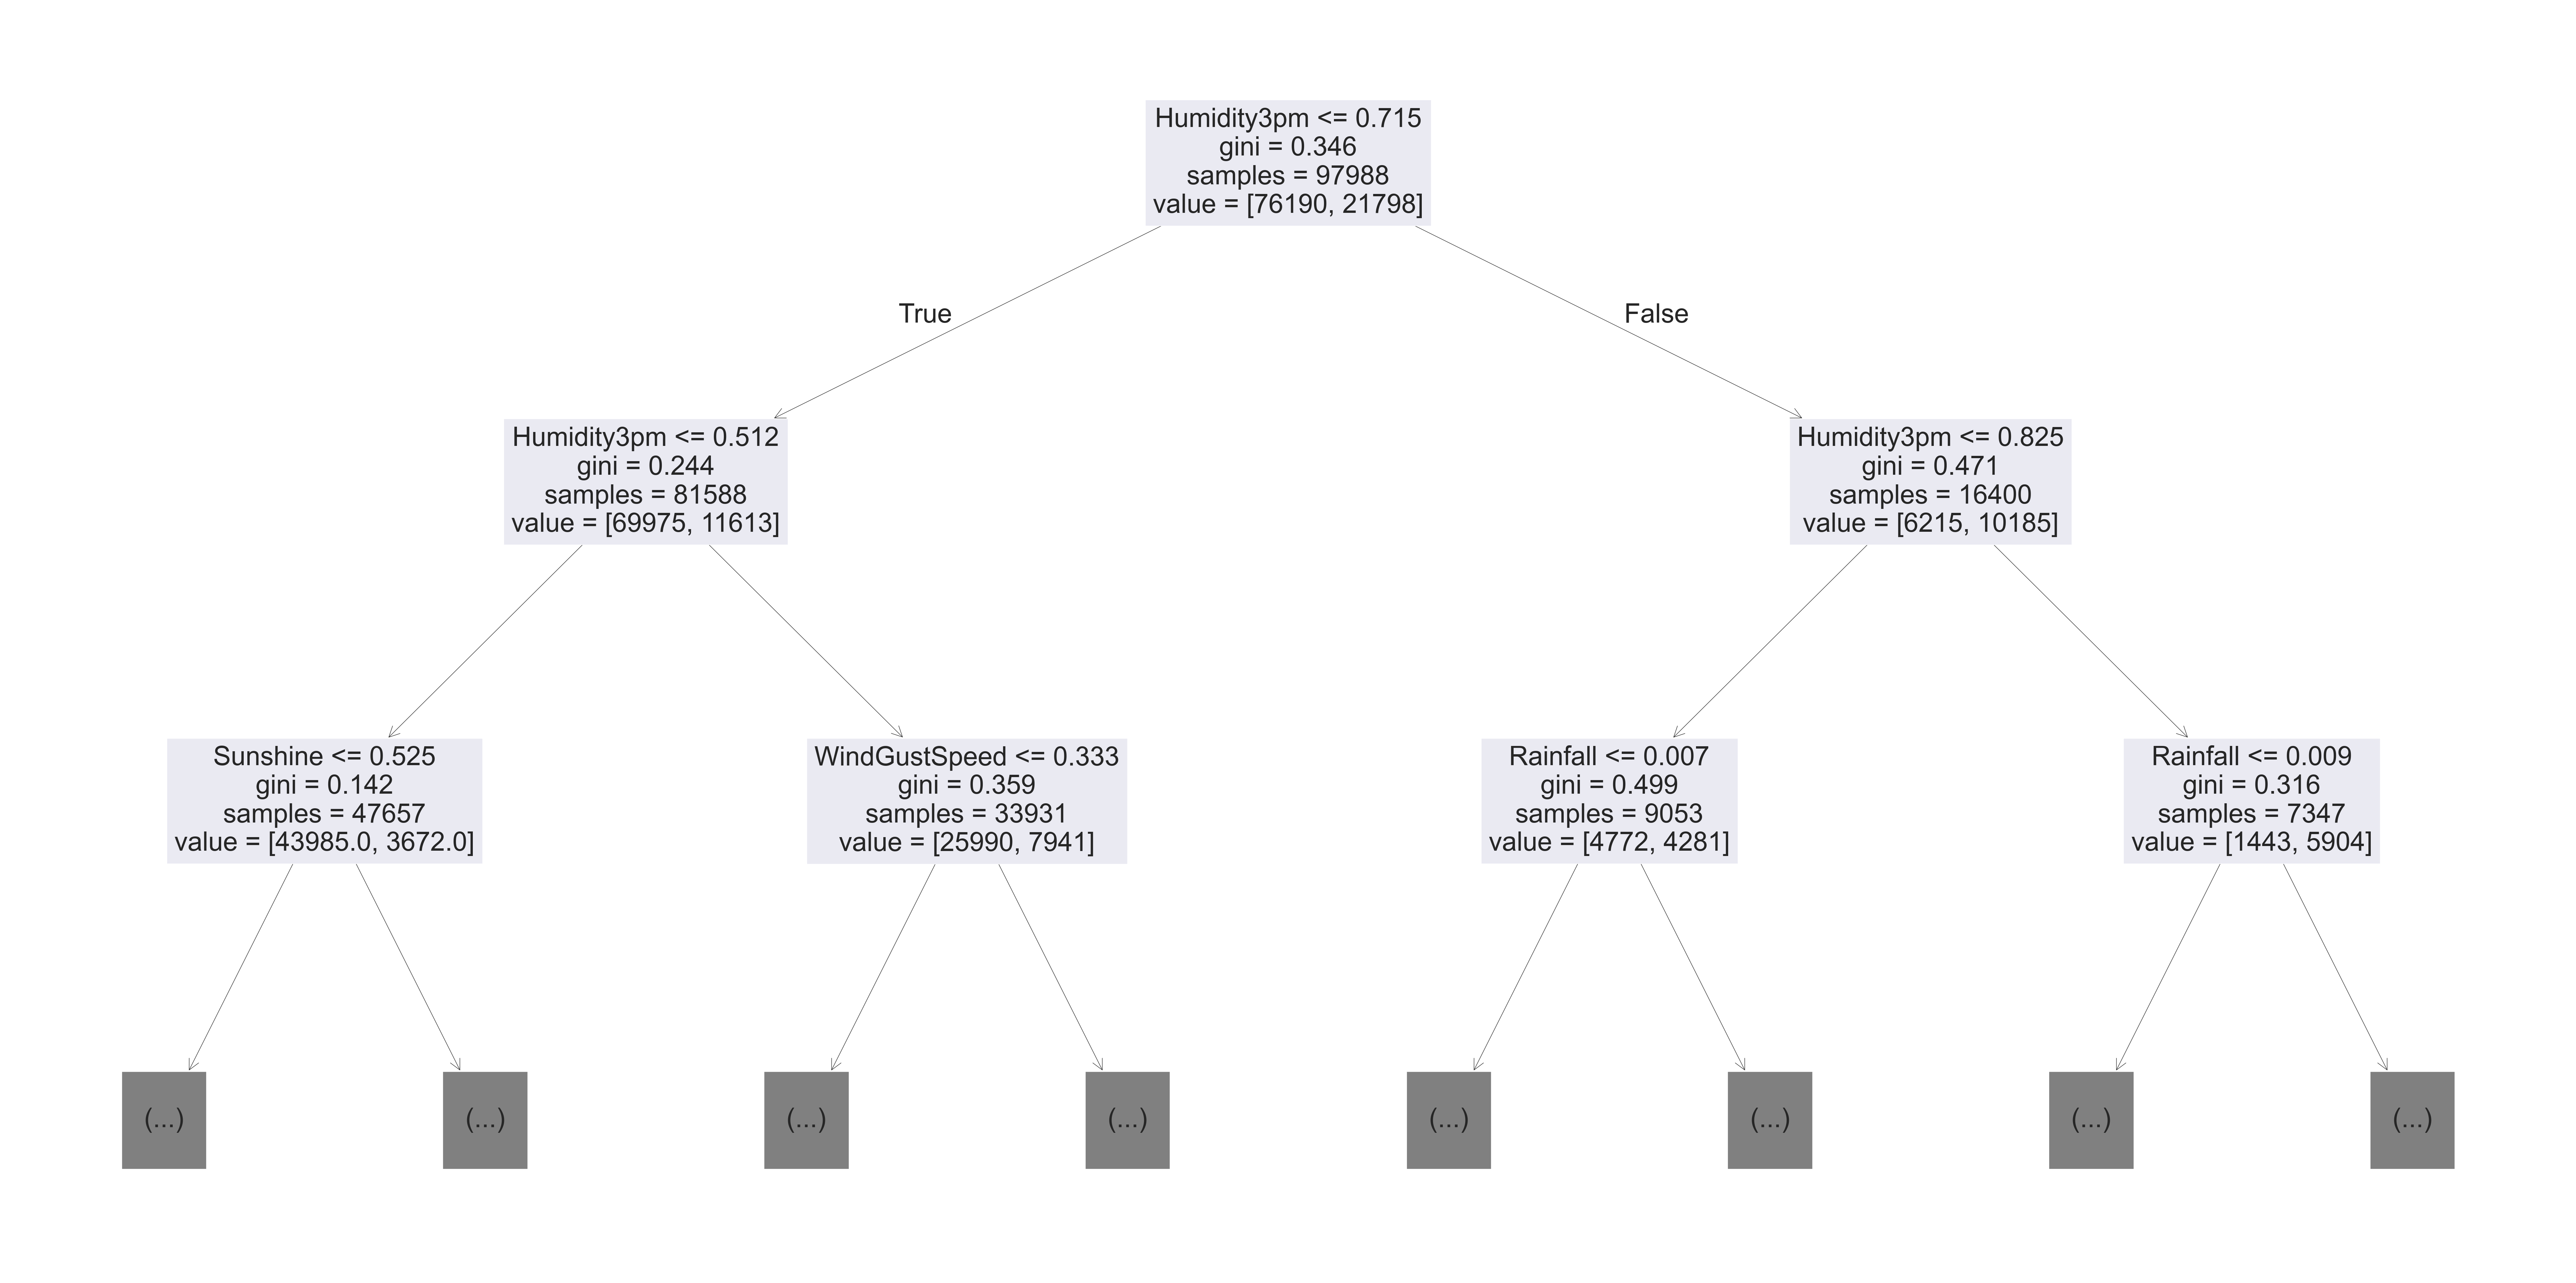

In [136]:
plt.figure(figsize=(100,50))
plot_tree(model,feature_names=x_train.columns,max_depth=2)

In [130]:
model.tree_.max_depth

11

In [152]:
#try cost complixity preuning

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
model=RandomForestClassifier(n_jobs=-1,random_state=42)

In [176]:
model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [177]:
base_acc=model.score(x_train,y_train)

In [178]:
base_valacc=model.score(x_val,y_val)

In [179]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

[Text(0.5, 0.875, 'Sunshine <= 0.403\ngini = 0.344\nsamples = 61960\nvalue = [76344, 21644]'),
 Text(0.25, 0.625, 'Location_Cairns <= 0.5\ngini = 0.499\nsamples = 11206\nvalue = [9273, 8335]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Rainfall <= 0.007\ngini = 0.498\nsamples = 10799\nvalue = [9032, 7934]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindDir9am_nan <= 0.5\ngini = 0.469\nsamples = 407\nvalue = [241, 401]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.276\nsamples = 50754\nvalue = [67071, 13309]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Humidity9am <= 0.675\ngini = 0.203\nsamples = 41293\nvalue = [57901, 7511]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Temp3pm <= 0.383\ngini = 0.475\nsamples = 9461\nvalue = [9170, 5798]'),
 Text(0.8125, 0.125, '\n  (...

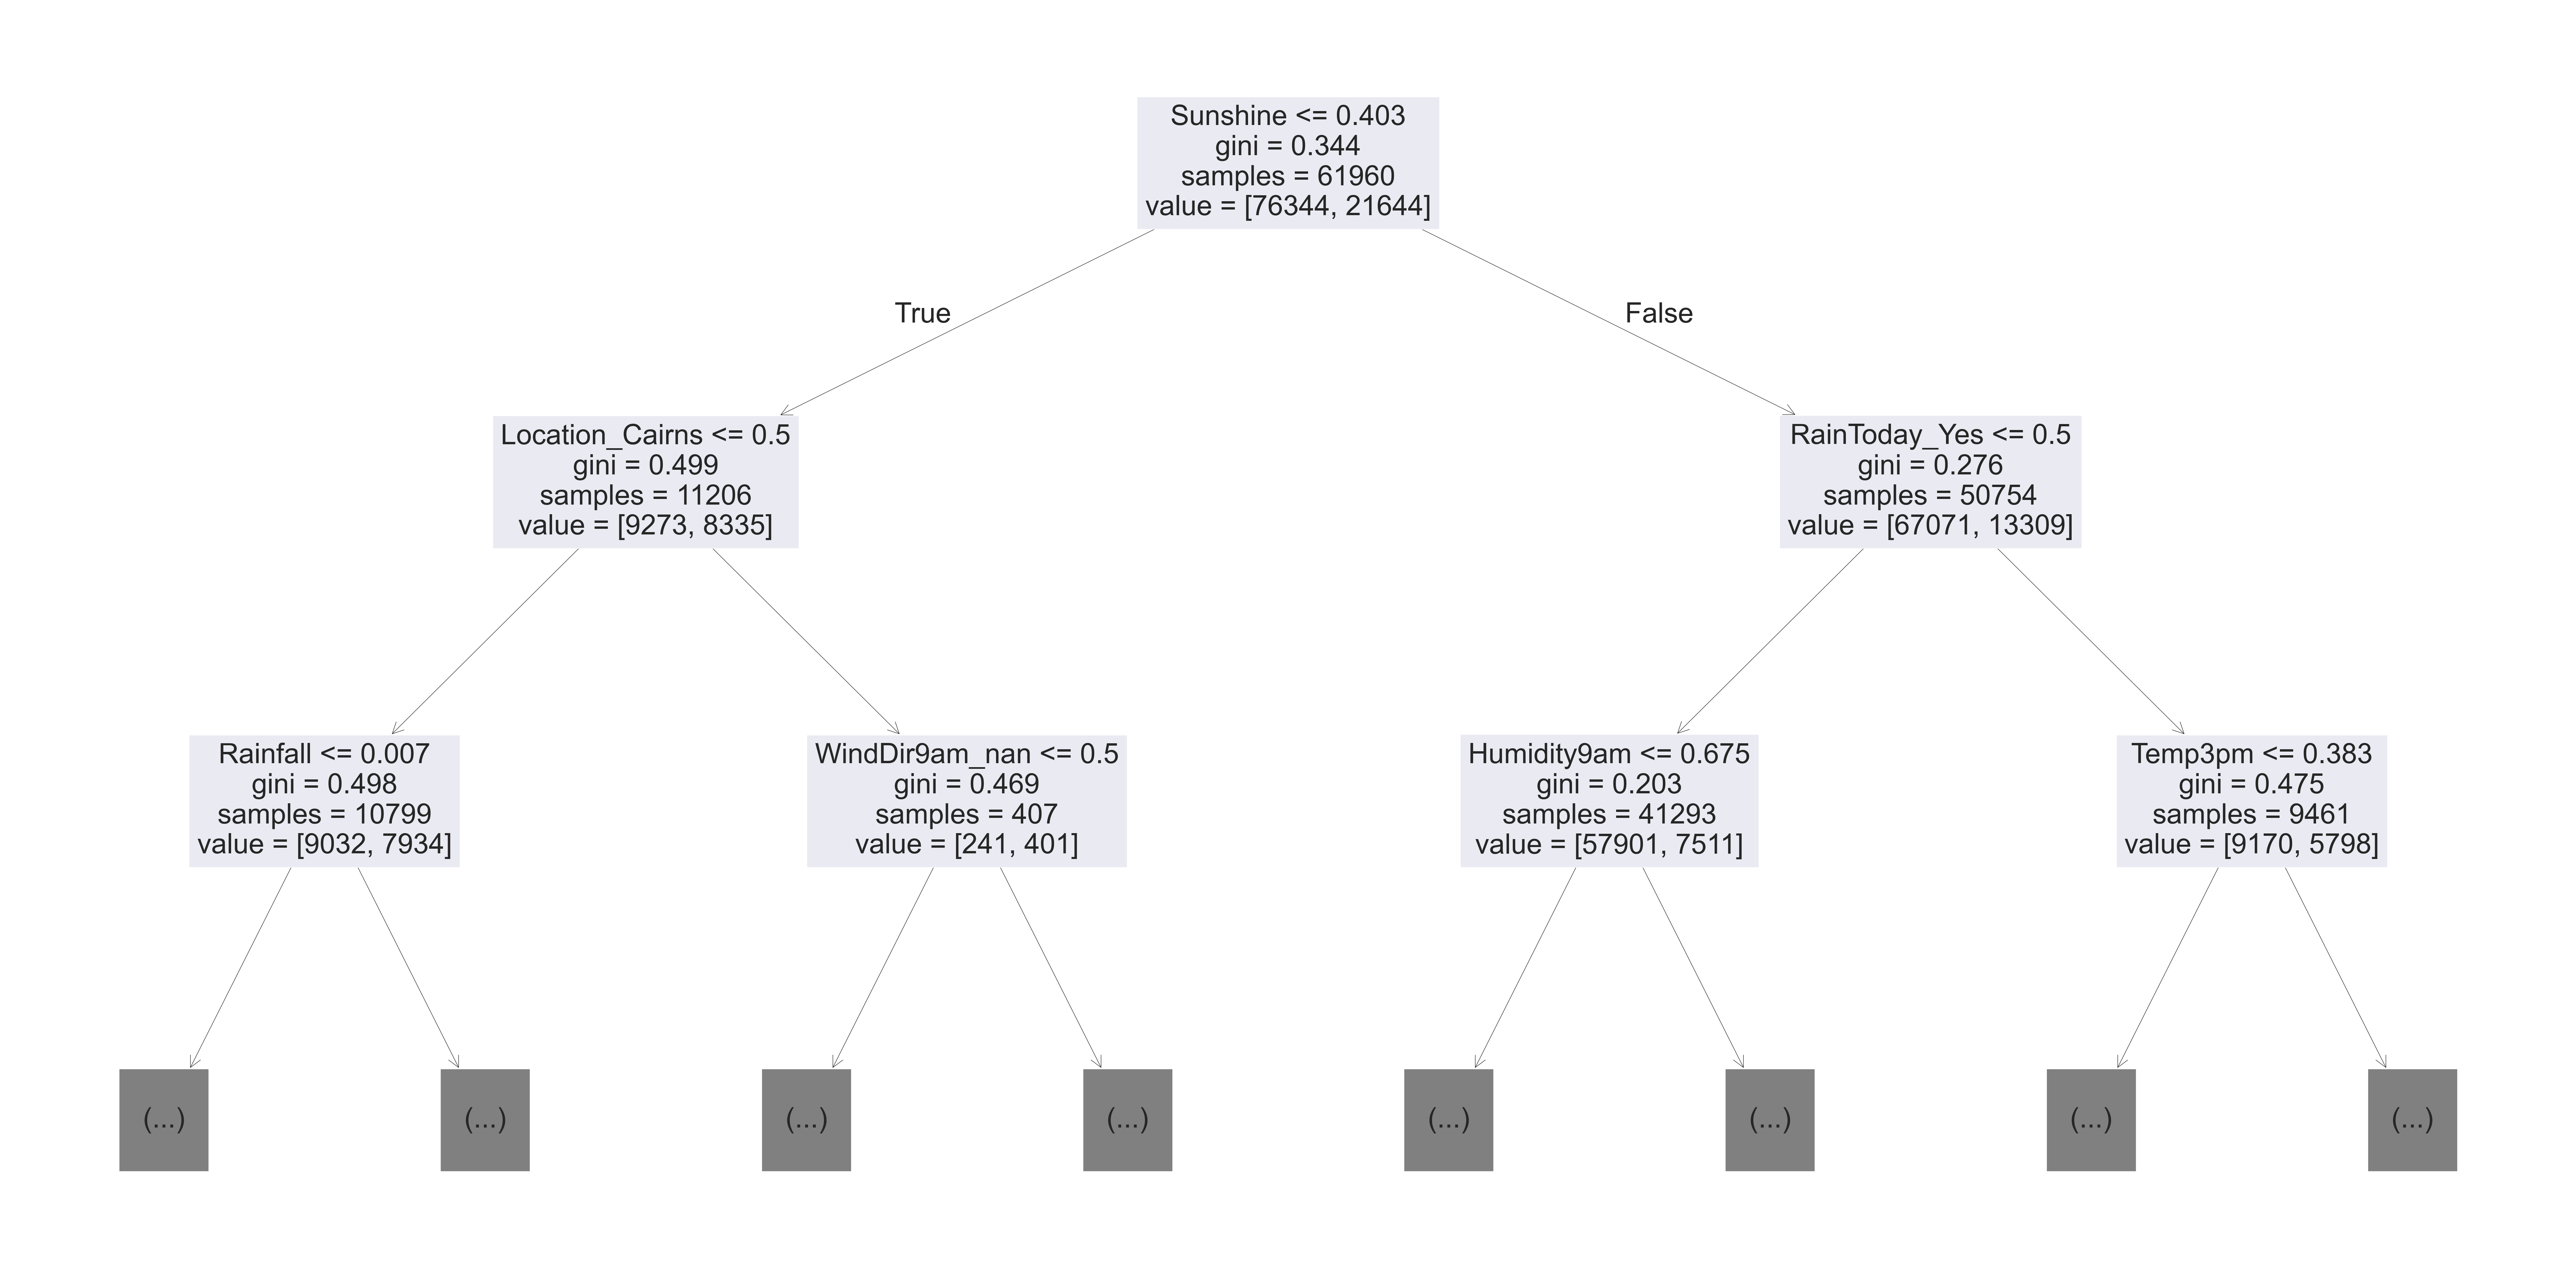

In [180]:
plt.figure(figsize=(100,50))
plot_tree(model.estimators_[0],feature_names=x_train.columns,max_depth=2)

[Text(0.5, 0.875, 'Location_Woomera <= 0.5\ngini = 0.348\nsamples = 62056\nvalue = [76037, 21951]'),
 Text(0.25, 0.625, 'RainToday_Yes <= 0.5\ngini = 0.351\nsamples = 60721\nvalue = [74120, 21798]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Location_Walpole <= 0.5\ngini = 0.26\nsamples = 46861\nvalue = [62679, 11361]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Sunshine <= 0.562\ngini = 0.499\nsamples = 13860\nvalue = [11441.0, 10437.0]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindSpeed3pm <= 0.333\ngini = 0.137\nsamples = 1335\nvalue = [1917, 153]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Humidity9am <= 0.945\ngini = 0.112\nsamples = 1078\nvalue = [1560, 99]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Temp3pm <= 0.35\ngini = 0.228\nsamples = 257\nvalue = [357, 54]'),
 Text(0.8125, 0.125, '\

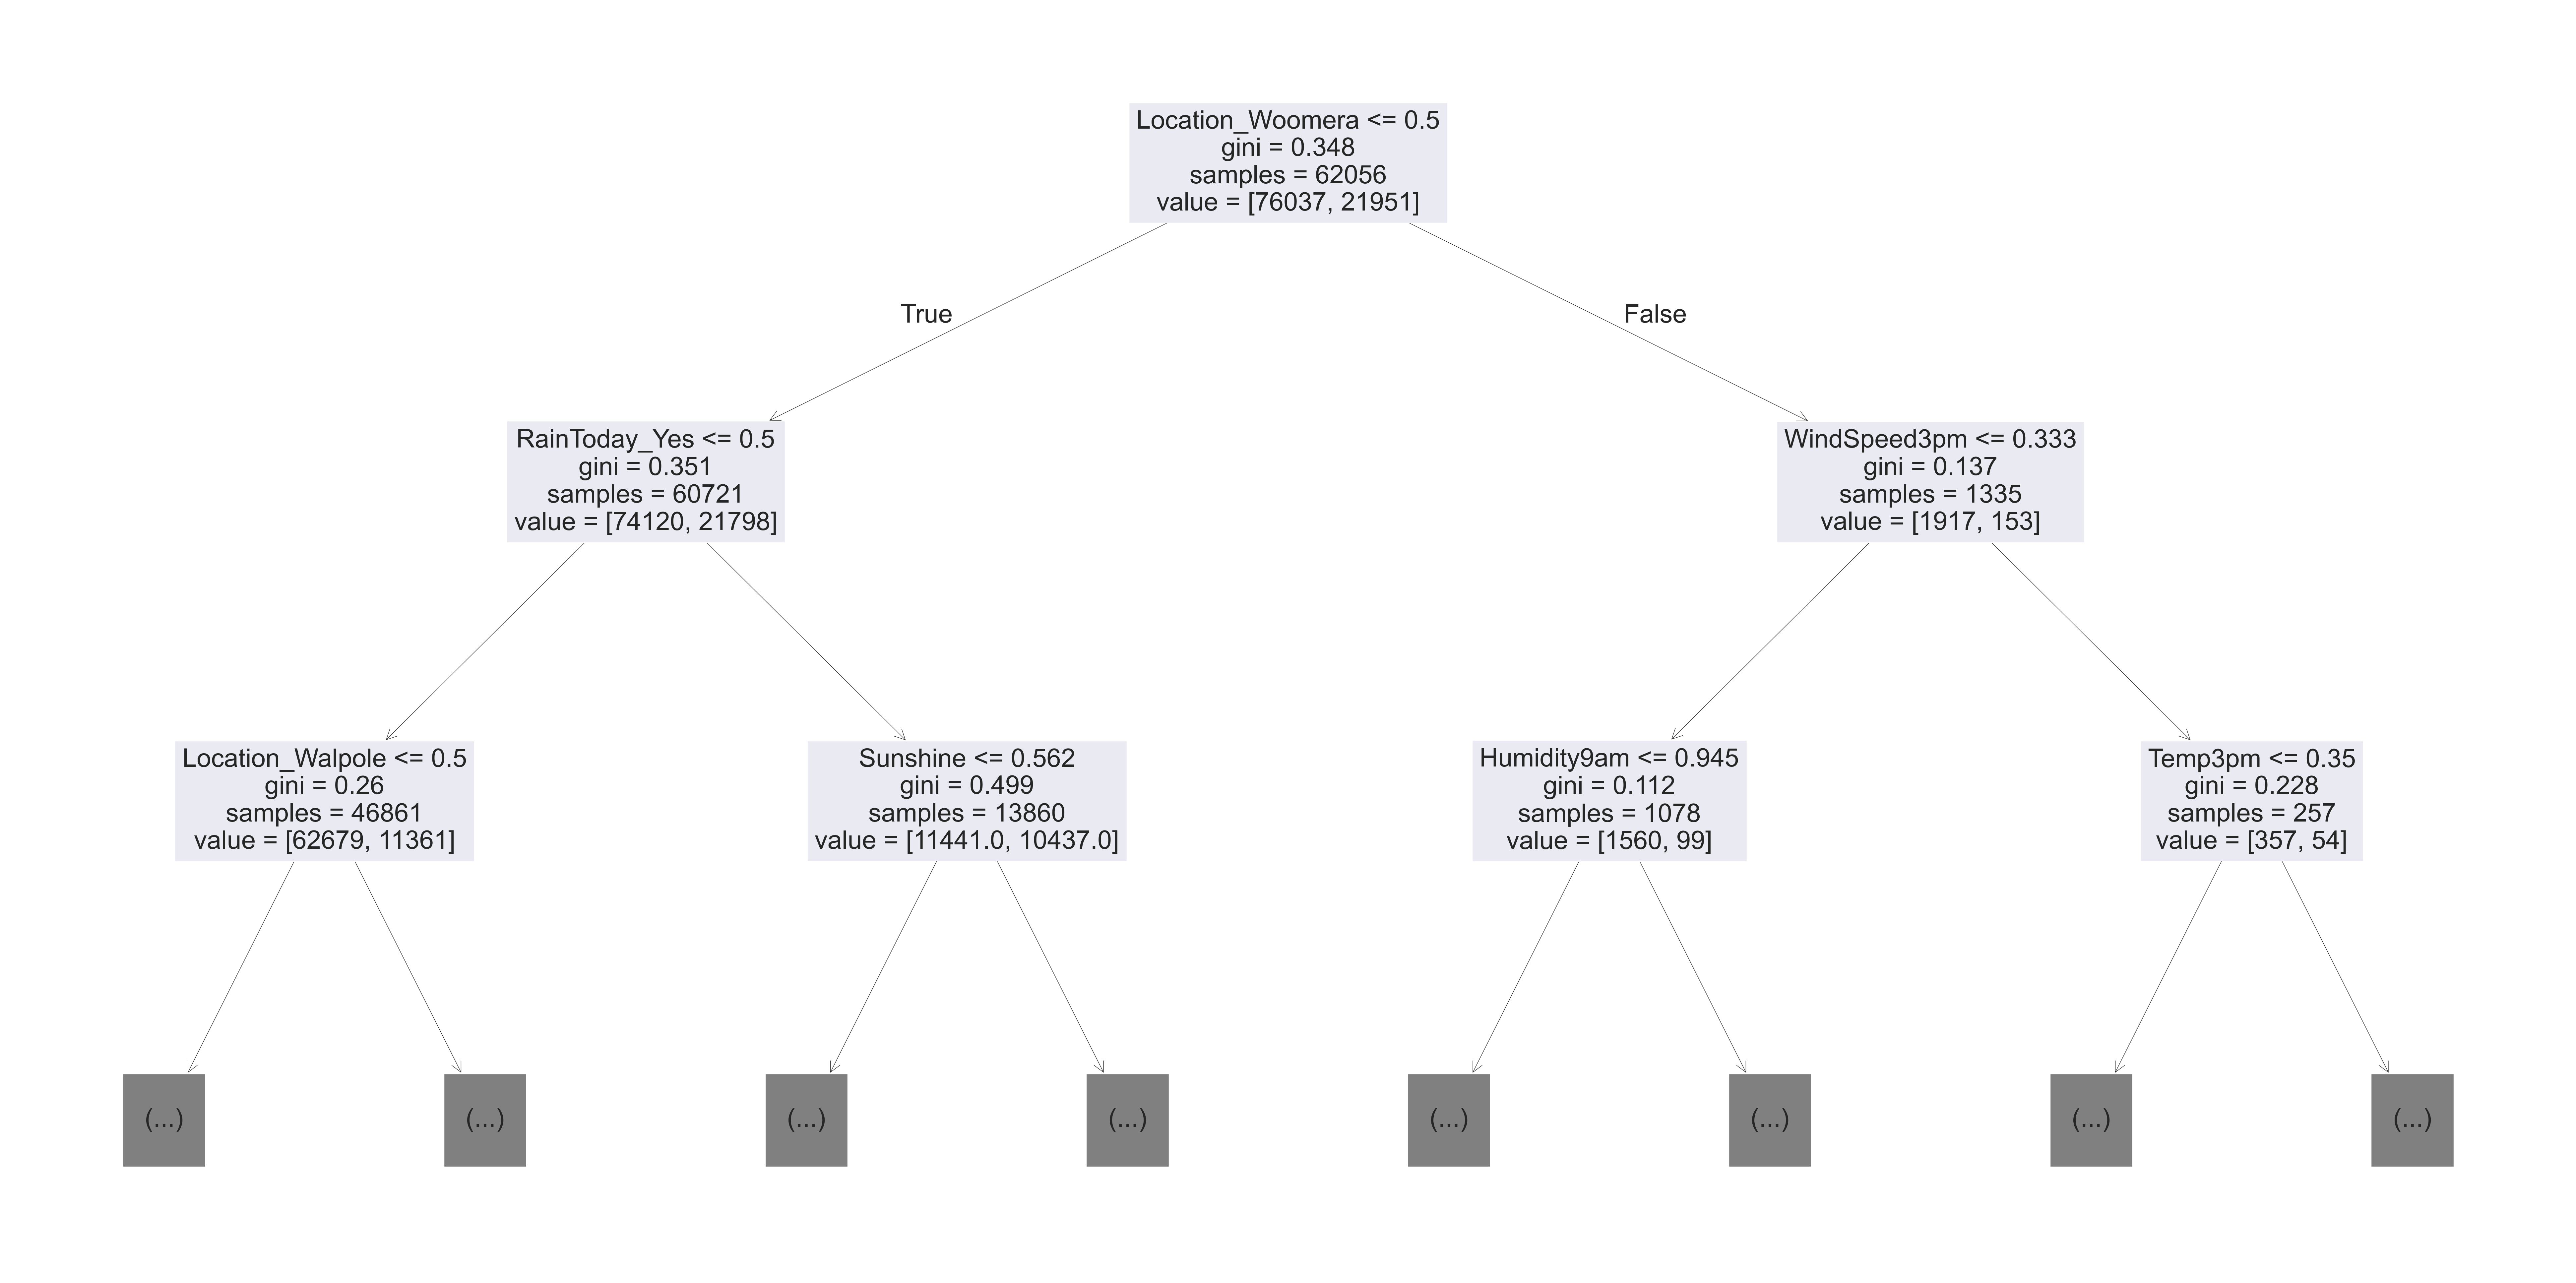

In [181]:
plt.figure(figsize=(100,50))
plot_tree(model.estimators_[30],feature_names=x_train.columns,max_depth=2)

In [182]:
importance_df=pd.DataFrame({'feature':x_train.columns,
                           'importance':model.feature_importances_}).sort_values('importance',ascending=False)

<Axes: xlabel='importance', ylabel='feature'>

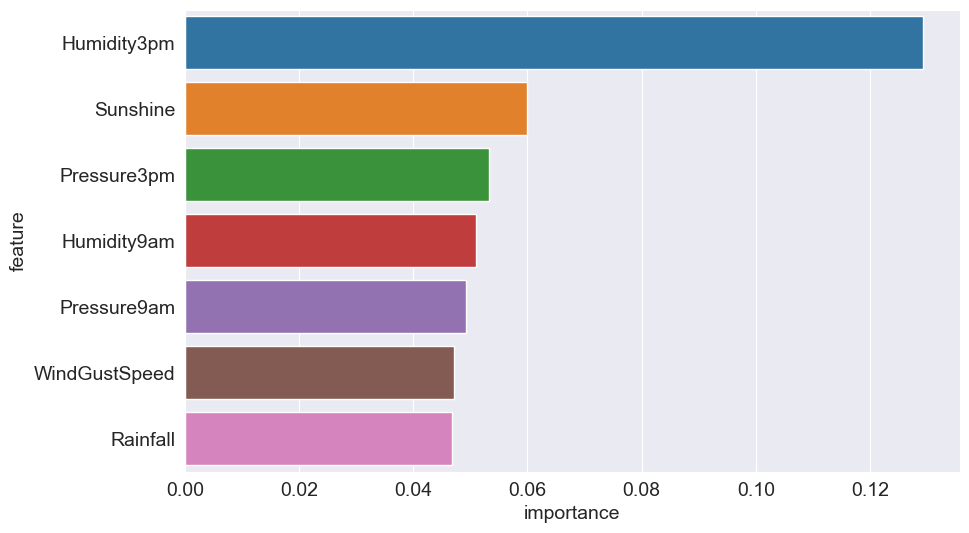

In [183]:
sns.barplot(data=importance_df.head(7),x='importance',y='feature')

In [184]:
?RandomForestClassifier

# Hyper tunning

In [187]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=10)
model.fit(x_train,y_train)
print("base_acc:",base_acc)
print("train Score",model.score(x_train,y_train))
print("base_valacc",base_valacc)
print("test Score",model.score(x_val,y_val))

base_acc: 0.9999693840062048
train Score 0.9869882026370576
base_valacc 0.8567499561121189
test Score 0.8447539352800046


In [188]:
#max_depth,Max_leaf_nodes

In [191]:
def test_params(**params):
    model=RandomForestClassifier(n_jobs=-1,random_state=42,**params).fit(x_train,y_train)
    return model.score(x_train,y_train),model.score(x_val,y_val)

In [192]:
test_params(max_depth=5)

(0.8219067640935624, 0.8261454736965299)

In [194]:
test_params(max_depth=25)

(0.978385108380618, 0.8566914389373281)

In [196]:
test_params(max_features=6)

(0.9999795893374699, 0.8565158874129557)

In [197]:
test_params(max_features='log2')

(0.9999795893374699, 0.8565158874129557)

In [201]:
test_params(min_samples_split=5,min_samples_leaf=2)

(0.9570763766991877, 0.8553455439171397)

In [202]:
test_params(min_samples_split=100,min_samples_leaf=60)

(0.8516655100624566, 0.8458657616010299)

In [204]:
test_params(min_impurity_decrease=1e-7)

(0.9997040453933135, 0.857335127860027)

In [205]:
test_params(min_impurity_decrease=1e-2)

(0.7775441890843777, 0.7906255485985136)

In [206]:
test_params(min_impurity_decrease=1e-6)

(0.9887435196146467, 0.8569255076364913)

In [207]:
test_params(bootstrap=False)

(0.9999795893374699, 0.8579202996079349)

In [209]:
test_params(max_samples=0.9)

(0.9998469200310242, 0.8571595763356545)

In [210]:
test_params(class_weight="balanced")

(0.9999795893374699, 0.8558721984902569)

In [213]:
test_params(class_weight={"No":1,"Yes":2})

(0.9999693840062048, 0.8557551641406753)

#best for binary classification